# BEAST Cancer - FA and 7 features - Classification

In [1]:
#Import packages
import pandas as pd
import numpy as np

#import xgboost
from xgboost import XGBClassifier

#import sklearn 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import *
from sklearn import metrics

import shap

import os

import  warnings
warnings.filterwarnings('ignore')

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## Preprocessing of data 

### Load data and declare feature vector and target variable

In [2]:
df = pd.read_csv("/Users/justine_labory/Desktop/github/plantnet/Metabolomic_project/breast_project/data/BREAST_FA_7Factors.csv")
X=df.drop("Label", axis=1)
y=df["Label"]

In [3]:
X.head()

,F2,F7,F3,F1,F6,F5,F4
0,0.651644,-0.973464,1.453331,1.239069,0.073400,-0.773205,0.532483
1,1.562377,-0.199315,-0.591908,-0.769720,0.355537,-0.773656,-1.755401
2,0.520768,1.123562,1.025986,0.247902,0.904360,0.435150,-0.202912
3,1.666024,-0.291522,-0.956699,-0.975120,2.403312,-2.008639,-1.045195
4,0.504850,-0.121408,1.399029,0.741920,-0.467964,0.573747,0.641350


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

### Run XGBoost model with cross validation

In [5]:
# Define the number of splits and the number of repeats
n_splits = 4
n_repeats = 5

[[ 8  9]
 [ 1 50]]
0.8529411764705882
0.7254901960784313
0.909090909090909
0.847457627118644
0.9803921568627451
0.8512110726643599


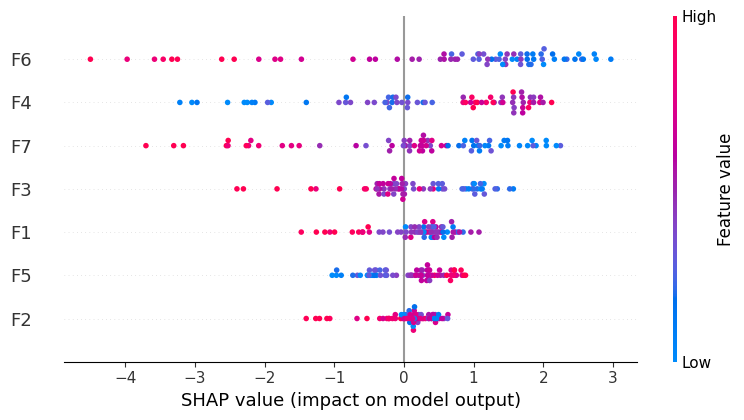

[[10  7]
 [ 6 45]]
0.8088235294117647
0.7352941176470589
0.8737864077669903
0.8653846153846154
0.8823529411764706
0.8292964244521339


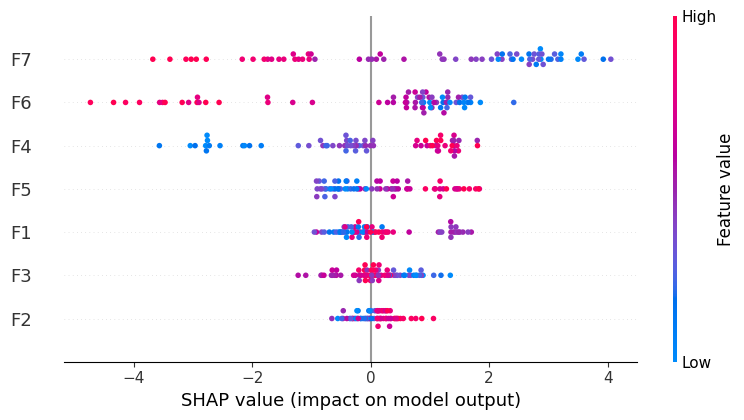

[[14  3]
 [ 4 47]]
0.8970588235294118
0.8725490196078431
0.9306930693069307
0.94
0.9215686274509803
0.8742791234140715


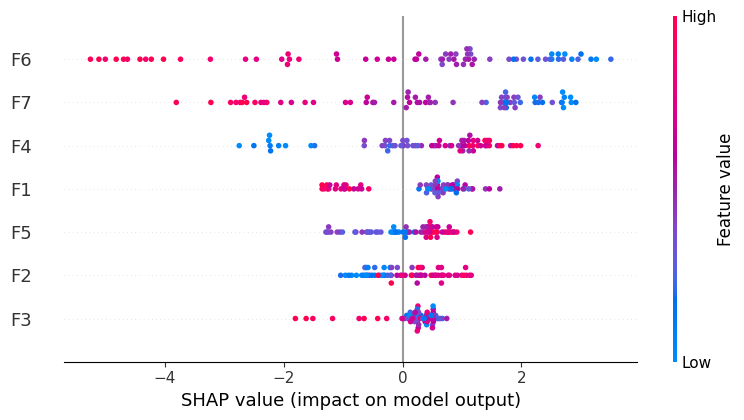

[[ 9  7]
 [ 2 49]]
0.8656716417910447
0.7616421568627452
0.9158878504672897
0.875
0.9607843137254902
0.9154411764705883


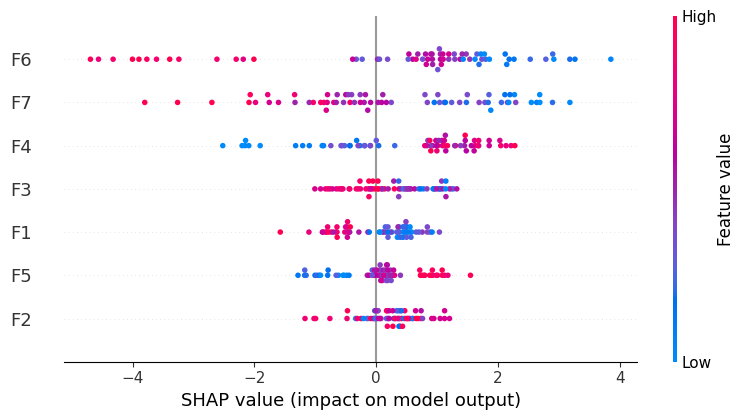

[[ 9  8]
 [ 5 46]]
0.8088235294117647
0.7156862745098039
0.8761904761904761
0.8518518518518519
0.9019607843137255
0.8546712802768166


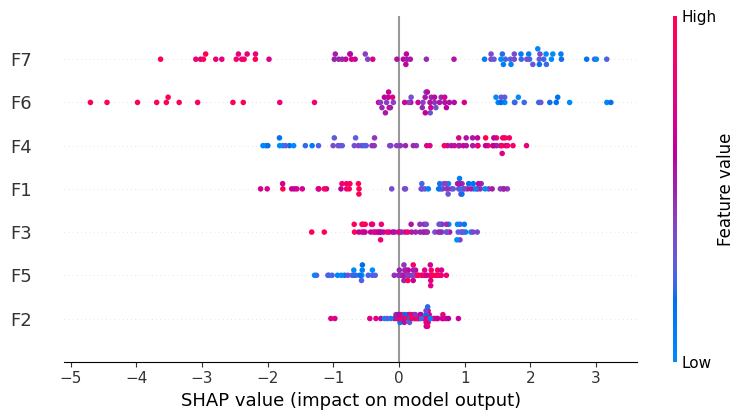

[[12  5]
 [ 4 47]]
0.8676470588235294
0.8137254901960784
0.9126213592233009
0.9038461538461539
0.9215686274509803
0.8835063437139562


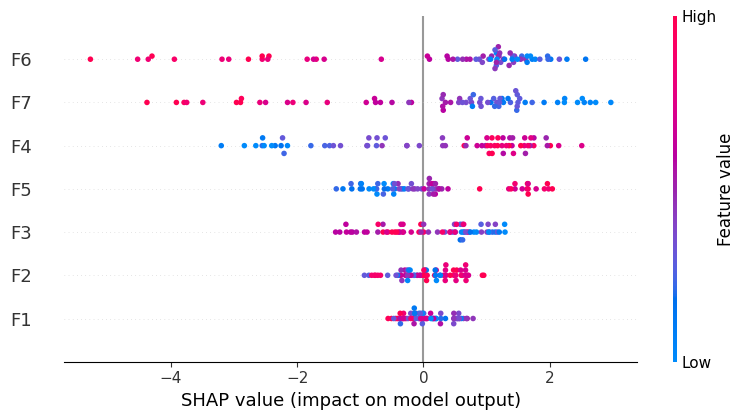

[[12  5]
 [ 4 47]]
0.8676470588235294
0.8137254901960784
0.9126213592233009
0.9038461538461539
0.9215686274509803
0.9158016147635524


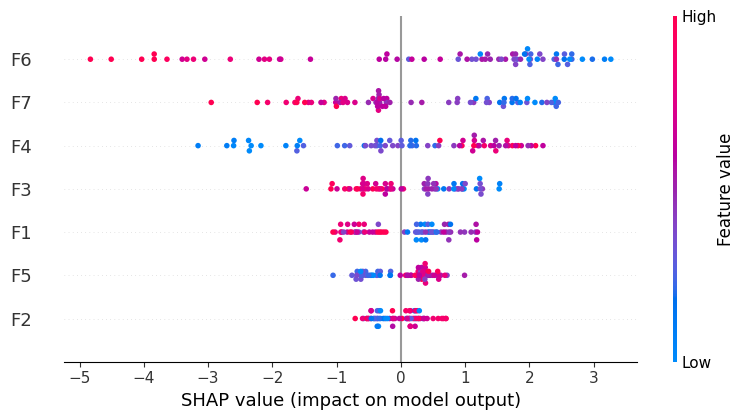

[[ 9  7]
 [ 4 47]]
0.835820895522388
0.7420343137254901
0.8952380952380952
0.8703703703703703
0.9215686274509803
0.8149509803921569


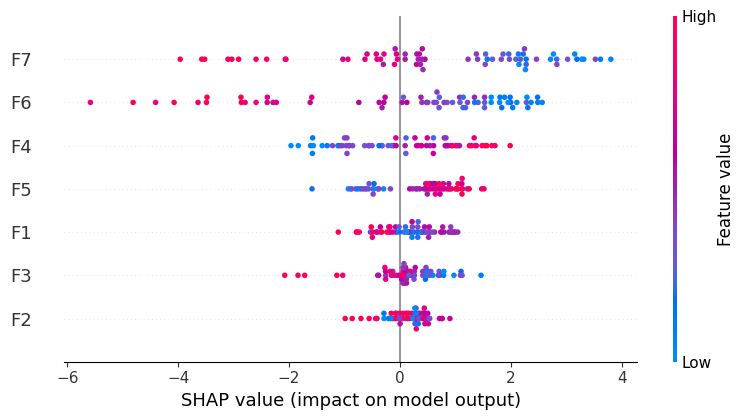

[[12  5]
 [ 3 48]]
0.8823529411764706
0.8235294117647058
0.923076923076923
0.9056603773584906
0.9411764705882353
0.9158016147635525


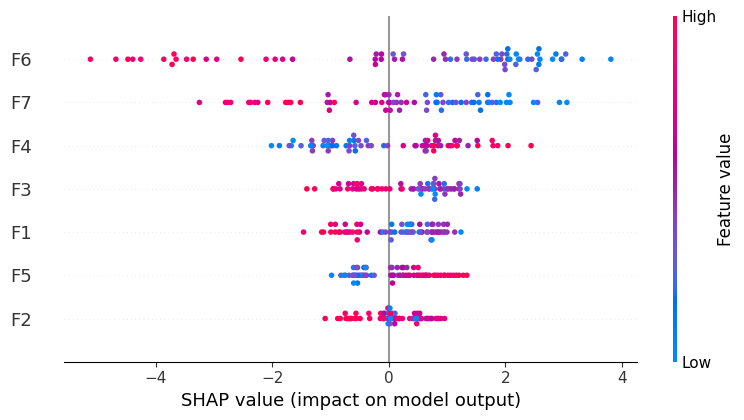

[[11  6]
 [ 3 48]]
0.8676470588235294
0.7941176470588236
0.9142857142857143
0.8888888888888888
0.9411764705882353
0.8362168396770473


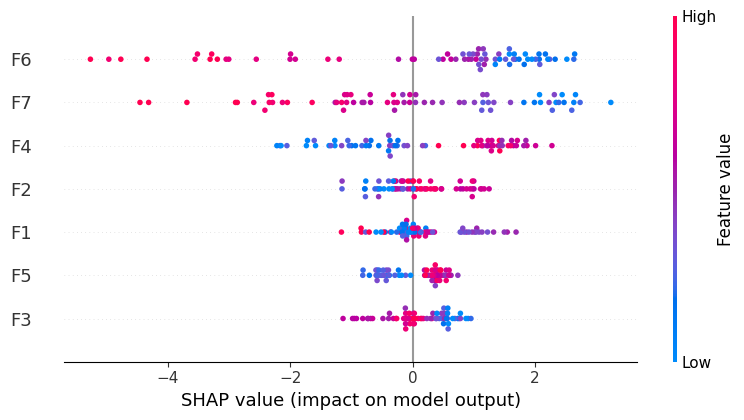

[[10  7]
 [ 3 48]]
0.8529411764705882
0.7647058823529411
0.9056603773584905
0.8727272727272727
0.9411764705882353
0.8258362168396771


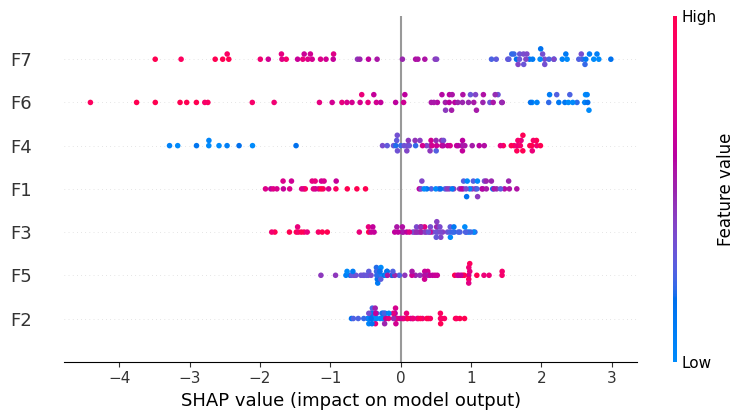

[[ 9  7]
 [ 2 49]]
0.8656716417910447
0.7616421568627452
0.9158878504672897
0.875
0.9607843137254902
0.8590686274509804


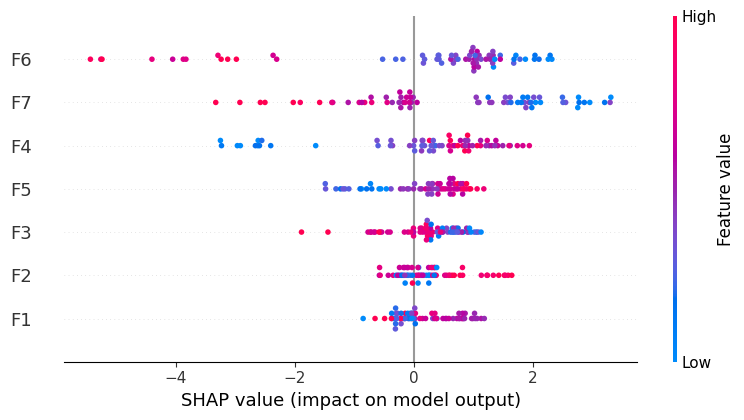

[[12  5]
 [ 8 43]]
0.8088235294117647
0.7745098039215687
0.8686868686868686
0.8958333333333334
0.8431372549019608
0.8638985005767013


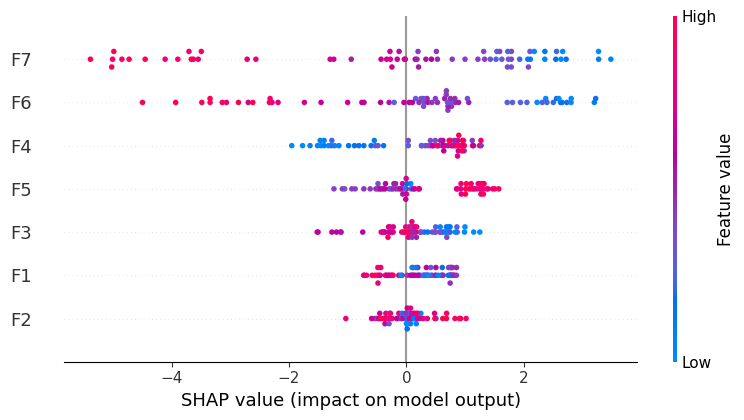

[[11  6]
 [ 4 47]]
0.8529411764705882
0.7843137254901961
0.9038461538461539
0.8867924528301887
0.9215686274509803
0.8835063437139562


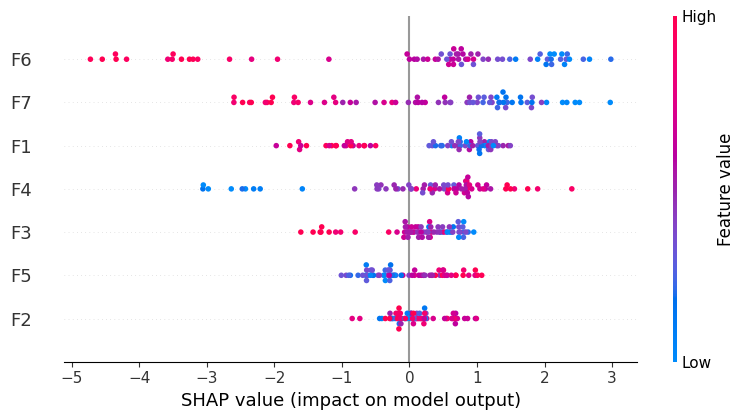

[[11  6]
 [ 2 49]]
0.8823529411764706
0.803921568627451
0.9245283018867925
0.8909090909090909
0.9607843137254902
0.9008073817762399


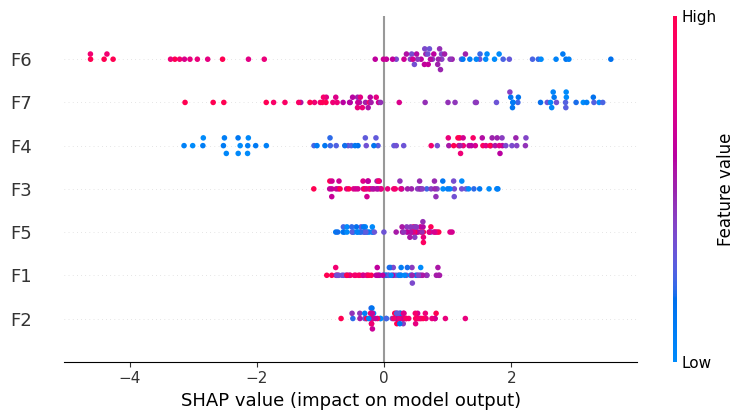

[[11  5]
 [ 1 50]]
0.9104477611940298
0.8339460784313726
0.9433962264150944
0.9090909090909091
0.9803921568627451
0.9178921568627451


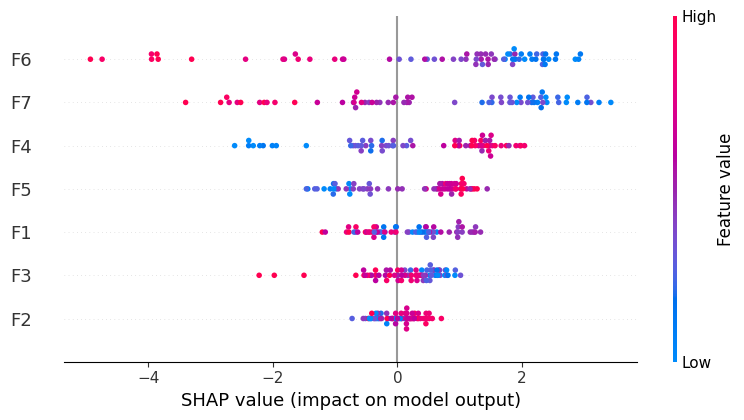

[[ 9  8]
 [ 3 48]]
0.8382352941176471
0.7352941176470589
0.897196261682243
0.8571428571428571
0.9411764705882353
0.8708189158016147


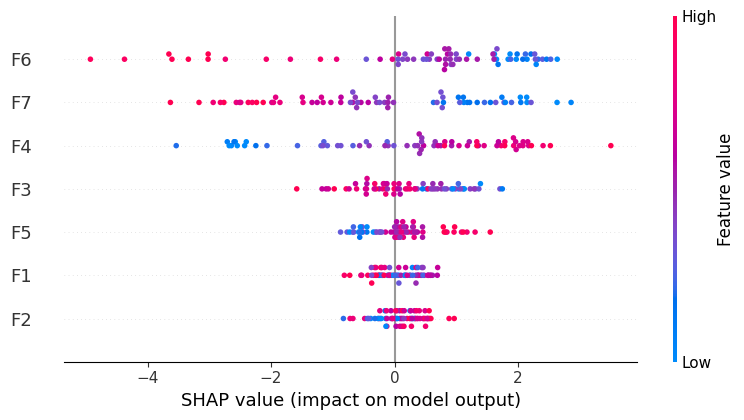

[[13  4]
 [ 4 47]]
0.8823529411764706
0.8431372549019607
0.9215686274509803
0.9215686274509803
0.9215686274509803
0.9319492502883506


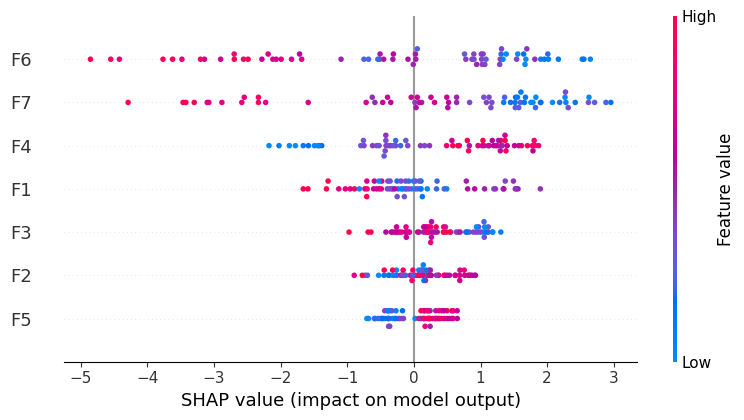

[[11  6]
 [ 4 47]]
0.8529411764705882
0.7843137254901961
0.9038461538461539
0.8867924528301887
0.9215686274509803
0.8212226066897347


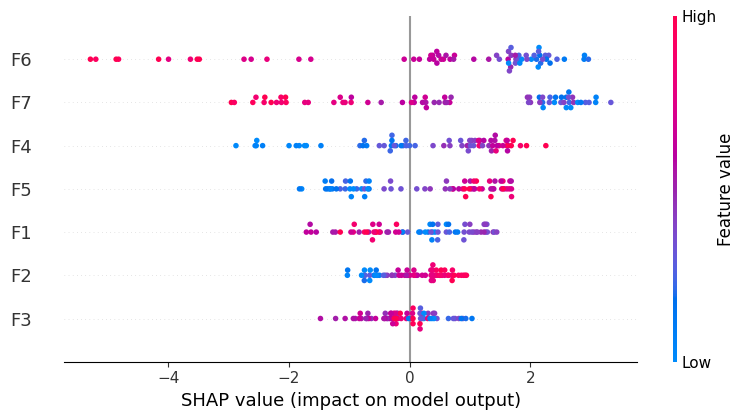

[[ 7  9]
 [ 1 50]]
0.8507462686567164
0.7089460784313726
0.909090909090909
0.847457627118644
0.9803921568627451
0.8639705882352942


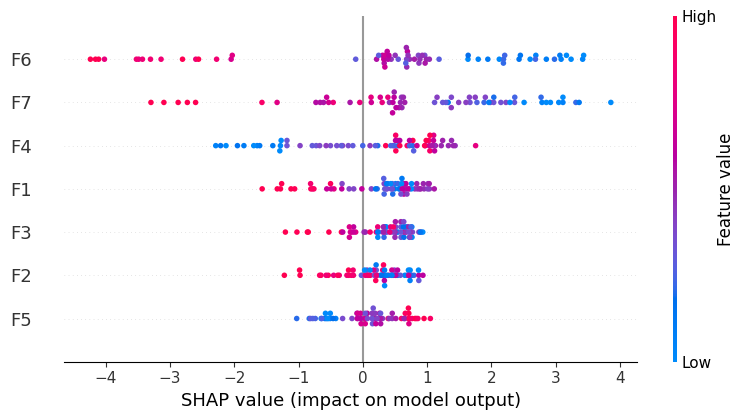

In [6]:
rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=0)

df_metrics = pd.DataFrame(columns=['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1score',
                                   'roc_auc', 'specificity'],
                         index = ['fold' + str(x) for x in range(1,(n_splits*n_repeats +1))])


for i, (train_index, test_index) in enumerate(rkf.split(X,y)):
    
    X_train=X.iloc[train_index]
    y_train=y.iloc[train_index]
    X_test=X.iloc[test_index]
    y_test=y.iloc[test_index]


    xgboost = XGBClassifier(seed=1234)

    xgboost = xgboost.fit(X_train,y_train)
    y_pred_proba = xgboost.predict_proba(X_test)[:,1]
    # # Get predicted probability
    y_pred = xgboost.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    tp = cm[1, 1]
    
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1score = metrics.f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    spe= tn / (tn + fp)
    
    # Fill in the dataframe with metrics
    df_metrics.iloc[i] = [acc, bal_acc, f1score, precision, recall, roc_auc, spe]
    
    print(acc)
    print(bal_acc)
    print(f1score)
    print(precision)
    print(recall)
    print(roc_auc)

#     Add feature importance with SHAP

    explainer = shap.TreeExplainer(xgboost)
    shap_values = explainer.shap_values(X_test)
    #shap.summary_plot(shap_values, X_test, plot_type="bar")
    shap.summary_plot(shap_values, X_test)

In [7]:
df_metrics

,accuracy,balanced_accuracy,precision,recall,f1score,roc_auc,specificity
fold1,0.852941,0.72549,0.909091,0.847458,0.980392,0.851211,0.470588
fold2,0.808824,0.735294,0.873786,0.865385,0.882353,0.829296,0.588235
fold3,0.897059,0.872549,0.930693,0.94,0.921569,0.874279,0.823529
fold4,0.865672,0.761642,0.915888,0.875,0.960784,0.915441,0.5625
fold5,0.808824,0.715686,0.87619,0.851852,0.901961,0.854671,0.529412
fold6,0.867647,0.813725,0.912621,0.903846,0.921569,0.883506,0.705882
fold7,0.867647,0.813725,0.912621,0.903846,0.921569,0.915802,0.705882
fold8,0.835821,0.742034,0.895238,0.87037,0.921569,0.814951,0.5625
fold9,0.882353,0.823529,0.923077,0.90566,0.941176,0.915802,0.705882
fold10,0.867647,0.794118,0.914286,0.888889,0.941176,0.836217,0.647059


## Compute mean and standard deviation of metrics

In [8]:
print(f'The mean accuracy is: {np.mean(df_metrics["accuracy"])*100:.1f} (±{np.std(df_metrics["accuracy"])*100:.1f}) ')
print(f'The mean balanced accuracy is: {np.mean(df_metrics["balanced_accuracy"])*100:.1f} (±{np.std(df_metrics["balanced_accuracy"])*100:.1f}) ')
print(f'The mean precision is: {np.mean(df_metrics["precision"])*100:.1f} (±{np.std(df_metrics["precision"])*100:.1f}) ')
print(f'The mean recall is: {np.mean(df_metrics["recall"])*100:.1f} (±{np.std(df_metrics["recall"])*100:.1f}) ')
print(f'The mean F1 score is: {np.mean(df_metrics["f1score"])*100:.1f} (±{np.std(df_metrics["f1score"])*100:.1f}) ')
print(f'The mean ROC AUC is: {np.mean(df_metrics["roc_auc"])*100:.1f} (±{np.std(df_metrics["roc_auc"])*100:.1f}) ')
print(f'The mean specificity is: {np.mean(df_metrics["specificity"])*100:.1f} (±{np.std(df_metrics["specificity"])*100:.1f}) ')

The mean accuracy is: 85.8 (±2.7) 
The mean balanced accuracy is: 78.0 (±4.4) 
The mean precision is: 90.8 (±1.8) 
The mean recall is: 88.5 (±2.4) 
The mean F1 score is: 93.3 (±3.3) 
The mean ROC AUC is: 87.2 (±3.5) 
The mean specificity is: 62.6 (±9.6) 


## Compute 95% CI

In [9]:
acc_ci= np.percentile(df_metrics["accuracy"], [2.5,97.5])
bal_acc_ci= np.percentile(df_metrics["balanced_accuracy"], [2.5,97.5])
precision_ci = np.percentile(df_metrics["precision"], [2.5,97.5])
recall_ci= np.percentile(df_metrics["recall"], [2.5,97.5])
f1_ci = np.percentile(df_metrics["f1score"], [2.5,97.5])
roc_auc_ci = np.percentile(df_metrics["roc_auc"], [2.5,97.5])
specificity_ci = np.percentile(df_metrics['specificity'], [2.5,97.5])

print(f'The confidence interval for accuracy is [{acc_ci[0]*100:.1f} ; {acc_ci[1]*100:.1f}]')
print(f'The confidence interval for balanced accucary is [{bal_acc_ci[0]*100:.1f} ; {bal_acc_ci[1]*100:.1f}]')
print(f'The confidence interval for precision is [{precision_ci[0]*100:.1f} ; {precision_ci[1]*100:.1f}]')
print(f'The confidence interval for recall is [{recall_ci[0]*100:.1f} ; {recall_ci[1]*100:.1f}]')
print(f'The confidence interval for F1 score is [{f1_ci[0]*100:.1f} ; {f1_ci[1]*100:.1f}]')
print(f'The confidence interval for ROC AUC score is [{roc_auc_ci[0]*100:.1f} ; {roc_auc_ci[1]*100:.1f}]')
print(f'The confidence interval for specificity score is [{specificity_ci[0]*100:.1f} ; {specificity_ci[1]*100:.1f}]')

The confidence interval for accuracy is [80.9 ; 90.4]
The confidence interval for balanced accucary is [71.2 ; 85.9]
The confidence interval for precision is [87.1 ; 93.7]
The confidence interval for recall is [84.7 ; 93.1]
The confidence interval for F1 score is [86.2 ; 98.0]
The confidence interval for ROC AUC score is [81.8 ; 92.5]
The confidence interval for specificity score is [45.3 ; 79.6]
